In [1]:
from matplotlib import pyplot as plt
import numpy as np

In [2]:
num_parameters = 63
data = ['H','H','H','T','T','T','T','T','T','T','T','T']

### Prior, Likelihood, and Posterior Plots

In [3]:
thetas = np.linspace(0.0,1.0,num_parameters+2) #Additional 2 parameters accounts for 0.0 and 1.0 cases

In [4]:
#Prior
#Assuming that our priors are just theta, from the book
priors = np.array([min(theta,negtheta) for theta,negtheta in zip(thetas,sorted(thetas,reverse=True))])

In [5]:
#Likelihood
headcount = data.count('H')
tailcount = data.count('T')
likelihoods = (thetas**headcount)*((1-thetas)**tailcount)

In [6]:
#Posterior
evidence = sum(likelihoods*np.array(priors))
posteriors = (likelihoods*priors)/evidence

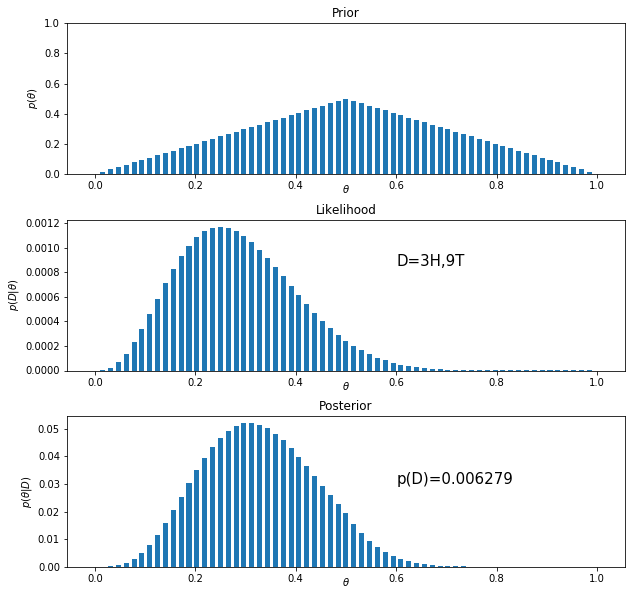

In [34]:
plt.figure(figsize=(10,10))
plt.subplots_adjust(hspace = 0.3)

plt.subplot(3,1,1)
plt.bar(thetas,priors, width = 0.01)
plt.title("Prior")
plt.xlabel(r"$\theta$",labelpad = -8)
plt.ylabel(r"$p( \theta )$")
plt.ylim(0,1)

plt.subplot(3,1,2)
plt.bar(thetas,likelihoods, width = 0.01)
plt.title("Likelihood")
plt.xlabel(r"$\theta$",labelpad = -8)
plt.ylabel(r"$p(D|\theta)$")
plt.annotate("D=%iH,%iT"%(headcount,tailcount),xy = (0.6, 0.00085),size=15)

plt.subplot(3,1,3)
plt.bar(thetas,posteriors, width = 0.01)
plt.title("Posterior")
plt.xlabel(r"$\theta$",labelpad = -8)
plt.ylabel(r"$p(\theta|D)$")
plt.annotate("p(D)=%1.6f"%evidence,xy=(0.6,0.03),size=15)

plt.show()